In [1]:
import humanize
import numpy as np
import pandas as pd
from datetime import datetime

%matplotlib inline

In [2]:
df = pd.read_csv('./data/CT-clean.csv')

D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318669 entries, 0 to 318668
Data columns (total 24 columns):
id                       318669 non-null object
state                    318669 non-null object
stop_date                318669 non-null object
stop_time                318447 non-null object
location_raw             318628 non-null object
county_name              318627 non-null object
county_fips              318627 non-null float64
fine_grained_location    317006 non-null object
police_department        318669 non-null object
driver_gender            318669 non-null object
driver_age_raw           318669 non-null int64
driver_age               318395 non-null float64
driver_race_raw          318669 non-null object
driver_race              318669 non-null object
violation_raw            318669 non-null object
violation                318669 non-null object
search_conducted         318669 non-null bool
search_type_raw          4846 non-null object
search_type              484

In [4]:
df.describe()

,county_fips,driver_age_raw,driver_age
count,318627.000000,318669.000000,318395.000000
mean,9008.013775,38.088041,38.119490
std,4.471330,14.463289,14.429378
min,9001.000000,0.000000,15.000000
25%,9003.000000,26.000000,26.000000
50%,9009.000000,35.000000,35.000000
75%,9011.000000,49.000000,49.000000
max,9015.000000,99.000000,99.000000


## Date range

In [5]:
first_date = datetime.strptime(df['stop_date'].min(), '%Y-%m-%d')
last_date = datetime.strptime(df['stop_date'].max(), '%Y-%m-%d')

In [6]:
humanize.naturaldelta(last_date - first_date)

'1 year, 5 months'

## Sample rows
### Columns 1-8

In [7]:
df.iloc[:,:8].head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location
0,CT-2013-00001,CT,2013-10-01,00:01,westport,Fairfield County,9001.0,"00000 N I 95 (WESTPORT, T158) X 18 LL"
1,CT-2013-00002,CT,2013-10-01,00:02,mansfield,Tolland County,9013.0,rte 195 storrs
2,CT-2013-00003,CT,2013-10-01,00:07,franklin,New London County,9011.0,Rt 32/whippoorwill
3,CT-2013-00004,CT,2013-10-01,00:10,danbury,Fairfield County,9001.0,I-84
4,CT-2013-00005,CT,2013-10-01,00:10,east hartford,Hartford County,9003.0,"00000 W I 84 (EAST HARTFORD, T043)E.OF XT.56"


In [8]:
df.iloc[:,:8].tail()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location
318664,CT-2015-39331,CT,2015-03-31,12:49,bolton,Tolland County,9013.0,"W RT 44 AND QUARRY RD (BOLTON, T012)"
318665,CT-2015-39332,CT,2015-03-31,12:49,killingly,Windham County,9015.0,395 s/b x 91
318666,CT-2015-39333,CT,2015-03-31,12:50,bridgeport,Fairfield County,9001.0,"00027 N I 95 (BRIDGEPORT, T015)"
318667,CT-2015-39334,CT,2015-03-31,12:52,enfield,Hartford County,9003.0,"00000 N EXIT 46 (ENFIELD, T049)"
318668,CT-2015-39335,CT,2015-03-31,12:59,washington,Litchfield County,9005.0,old litchfield rd


### Columns 9-16

In [9]:
df.iloc[:,8:16].head()

,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation
0,State Police,F,69,69.0,Black,Black,Speed Related,Speeding
1,State Police,M,20,20.0,White,White,Moving Violation,Moving violation
2,State Police,M,34,34.0,Hispanic,Hispanic,Speed Related,Speeding
3,State Police,M,46,46.0,Black,Black,Speed Related,Speeding
4,State Police,M,30,30.0,White,White,Speed Related,Speeding


### Columns 17-24

In [10]:
df.iloc[:,16:24].head()

,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id,stop_duration
0,False,NaN,NaN,False,Ticket,False,1000002754,1-15 min
1,False,NaN,NaN,False,Verbal Warning,False,1000001903,1-15 min
2,False,NaN,NaN,False,Ticket,False,1000002711,1-15 min
3,False,NaN,NaN,False,Written Warning,False,113658284,1-15 min
4,False,NaN,NaN,False,Ticket,False,830814942,1-15 min


In [11]:
df['stop_outcome'].unique()

array(['Ticket', 'Verbal Warning', 'Written Warning', nan, 'Summons',
       'Arrest'], dtype=object)

In [12]:
df['stop_outcome'].value_counts()

Ticket             218973
Verbal Warning      47753
Written Warning     27070
Summons             12205
Arrest               7312
Name: stop_outcome, dtype: int64

In [13]:
df['stop_outcome'].value_counts(normalize=True)

Ticket             0.698895
Verbal Warning     0.152413
Written Warning    0.086399
Summons            0.038955
Arrest             0.023338
Name: stop_outcome, dtype: float64

In [14]:
years = df['id'].apply(lambda x: int(x.split('-')[1]))
years.unique()

array([2013, 2014, 2015], dtype=int64)

# Data Preprocessing

## Null Values

In [15]:
df.isnull().sum()

id                            0
state                         0
stop_date                     0
stop_time                   222
location_raw                 41
county_name                  42
county_fips                  42
fine_grained_location      1663
police_department             0
driver_gender                 0
driver_age_raw                0
driver_age                  274
driver_race_raw               0
driver_race                   0
violation_raw                 0
violation                     0
search_conducted              0
search_type_raw          313823
search_type              313823
contraband_found              0
stop_outcome               5356
is_arrested                5356
officer_id                    0
stop_duration                 0
dtype: int64

## Replace stop_time nulls with median stop_time

In [16]:
populated = df['stop_time'].sort_values()
median_stop_time = populated[populated.shape[0] // 2]
print(median_stop_time)
df['stop_time'].fillna(median_stop_time, inplace=True)

08:29


In [17]:
df.isnull().sum()

id                            0
state                         0
stop_date                     0
stop_time                     0
location_raw                 41
county_name                  42
county_fips                  42
fine_grained_location      1663
police_department             0
driver_gender                 0
driver_age_raw                0
driver_age                  274
driver_race_raw               0
driver_race                   0
violation_raw                 0
violation                     0
search_conducted              0
search_type_raw          313823
search_type              313823
contraband_found              0
stop_outcome               5356
is_arrested                5356
officer_id                    0
stop_duration                 0
dtype: int64

## Convert `stop_time` to "morning, afternoon, evening, small hours"

In [18]:
def day_period(time_str):
    hour = time_str.hour

    if hour >= 0 and hour < 6:
        return 'Small Hours'
    elif hour >= 6 and hour < 12:
        return 'Morning'
    elif hour >= 12 and hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['day_period'] = pd.to_datetime(df['stop_time']).apply(day_period)


## Convert date to Season

In [19]:
def season(stop_date):
    month = datetime.strptime(stop_date, '%Y-%m-%d').month
    if month >= 3 and month < 6:
        return 'Spring'
    elif month >= 6 and month < 9:
        return 'Summer'
    elif month >= 9 and month < 12:
        return 'Fall'
    return 'Winter'


df['season'] = df['stop_date'].apply(season)


## Convert driver_gender to binary

In [20]:
df['is_male'] = df['driver_gender'].apply(lambda x: 1 if x == 'M' else 0)

## Fix violations

In [24]:
def fix_violation(violation):
    if violation == 'defective lights':
        return 'lights'
    elif violation == 'equipment violation':
        return 'equipment'
    elif violation == 'other/error':
        return 'other'
    elif violation == 'registration/plates':
        return 'registration'
    elif violation == 'seat belt':
        return 'seatbelt'
    elif violation == 'speed related':
        return 'speeding'
    elif violation == 'stop sign/light' or violation == 'stop sign':
        return 'bad_stop'
    return violation.replace(' ', '_')


violations = []

for violation in list(df.violation.unique()) + list(df.violation_raw.unique()):
    tokens = violation.lower().split(',')
    violations.extend([fix_violation(token) for token in tokens])

# print(sorted(set(violations)))

# violations_raw = []
# for violation in df.violation_raw.unique():
#     tokens = violation.lower().split(',')
#     violations_raw.extend(tokens)

# # print(sorted(set(violations_raw)))

# for v in sorted(set(violations + violations_raw)):
violations = sorted(set(violations))
for v in violations:
    print(v)

# all_vs = list(df.violation.unique()) + list(df.violation_raw.unique())
# all_vs

# df.index
def get_merged(violations):
    merged = []
    tokens = violations.lower().split(',')
    return list(set([fix_violation(violation) for violation in tokens]))
    
merged = df[['violation_raw', 'violation']].apply(lambda x: ','.join(x), axis=1).apply(get_merged)
merged

violation_col_headers = ['violation_{}'.format(violation.replace(' ', '_')) for violation in violations]
violation_col_headers

bad_stop
cell_phone
display_of_plates
equipment
license
lights
moving_violation
other
registration
safe_movement
seatbelt
speeding
suspended_license
traffic_control_signal
window_tint


['violation_bad_stop',
 'violation_cell_phone',
 'violation_display_of_plates',
 'violation_equipment',
 'violation_license',
 'violation_lights',
 'violation_moving_violation',
 'violation_other',
 'violation_registration',
 'violation_safe_movement',
 'violation_seatbelt',
 'violation_speeding',
 'violation_suspended_license',
 'violation_traffic_control_signal',
 'violation_window_tint']

In [25]:
def onehot_encode_violations(arr_violations):
    row = np.zeros(len(violations))
    for v in arr_violations:
        row[violations.index(v)] = 1
    return row

df_violations = merged.apply(onehot_encode_violations).apply(lambda x: pd.Series(x, dtype=int))
df_violations.columns = violation_col_headers


In [27]:
df_violations.sum()

violation_bad_stop                    7104
violation_cell_phone                 20017
violation_display_of_plates           5769
violation_equipment                   2958
violation_license                     2934
violation_lights                     12107
violation_moving_violation           27928
violation_other                      87411
violation_registration               37577
violation_safe_movement               5010
violation_seatbelt                   12093
violation_speeding                  100616
violation_suspended_license           2934
violation_traffic_control_signal      5010
violation_window_tint                 2262
dtype: int64

## Drop empty or unnecessary columns

In [21]:
# Rationale for dropping certain columns
#
# - id: Not needed
# - state: All values are "CT"
# - stop_date: Converted to season
# - stop_time: Binned to day_period above
# - location_raw`:  Gives specific city values, but this may be too granular.  county_name specifies a wider area that should
#                    encompass sufficient demographics to draw insights
# - county_fips: Repetitive with county_name.
# - fine_grained_location: Too specific.  county_name should be sufficient.
# - police_department:  All values are "State police"
# - search_type_raw and search_type: Very few values and doesn't provide insight for what we're seeking to answer
# - driver_gender: one-hot encoded to is_male
# - driver_age: repetitive as driver_age_raw provides same info, plus this column has some missing values
# - driver_race_raw: repetitive with driver_race
# - officer_id: There are many officers.  It might be more insightful to find out whether there is a systemic issue at the
#               organization level rather than individual
# - is_arrested: repetitive as stop_outcome has "Arrest" value
# - violation_raw and violation: No longer needed since values have been normalized and one-hot encoded
cols_to_drop = ['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_fips', 'fine_grained_location',
                'police_department', 'search_type_raw', 'search_type', 'driver_gender', 'driver_age', 'driver_race_raw',
                'officer_id', 'is_arrested', 'violation_raw', 'violation']
df = df.drop(cols_to_drop, axis=1)

## Drop empty `stop_outcome` rows

In [23]:
# Remove rows with empty values in specific fields
df = df.dropna(subset=['stop_outcome'], axis=0)

## Data Distributions

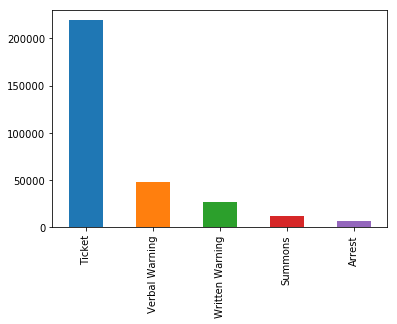

In [22]:
df['stop_outcome'].value_counts().plot('bar')